In [9]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import signal
import matplotlib.ticker as ticker
#import seaborn as sns; sns.set()

datas = ['mini_test', 'crop','euro', 'isic', 'chest']
datas_fg = ["cars", 'cub', "places", "plantae", 'tiered_test']
datas_full = ['miniIM test', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']
import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts

In [ ]:
def fmt(x, pos):
    return '{}%'.format(int(x))

### Layer Diff

In [54]:
len(df1.columns)

38

In [55]:
path1 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/layer_diff_l2.csv'.format(data)
df1 = pd.read_csv(path1, index_col='Unnamed: 0')
df1

,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN1.weight,backbone.trunk.7.BN1.bias,backbone.trunk.7.C2.weight,backbone.trunk.7.BN2.weight,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias
1,0.073530,0.038278,0.018761,0.112392,0.025620,0.030932,0.109645,0.024335,0.014328,0.139913,...,0.111525,0.066240,0.765052,0.051578,0.017138,0.293181,0.023665,0.017138,0.948510,0.022246
2,0.088603,0.031897,0.020966,0.110907,0.029354,0.032518,0.106156,0.023611,0.014925,0.144717,...,0.110129,0.066108,0.734951,0.053559,0.015210,0.297075,0.025190,0.015210,0.984923,0.010261
3,0.081175,0.034356,0.016307,0.102427,0.030799,0.026538,0.109051,0.026279,0.014653,0.149275,...,0.112147,0.067667,0.726250,0.049166,0.018147,0.286187,0.024318,0.018147,0.917666,0.017251
4,0.091207,0.037045,0.020326,0.119364,0.024109,0.025054,0.116623,0.024364,0.014130,0.158124,...,0.109492,0.065671,0.725527,0.050648,0.016781,0.287311,0.023217,0.016781,0.958744,0.033028
5,0.088141,0.032583,0.019274,0.108483,0.028545,0.025851,0.114807,0.021459,0.016180,0.155519,...,0.101022,0.060739,0.738421,0.050132,0.016169,0.288915,0.024341,0.016169,0.961388,0.014785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.073628,0.032709,0.021151,0.104801,0.026139,0.026039,0.112381,0.022440,0.011858,0.149592,...,0.109036,0.066005,0.746021,0.050204,0.016852,0.290548,0.024155,0.016852,0.929345,0.015225
97,0.062463,0.037645,0.018234,0.090541,0.025154,0.019658,0.098614,0.021994,0.010727,0.137886,...,0.103906,0.064786,0.734944,0.054738,0.016585,0.286818,0.025927,0.016585,0.997183,0.012969
98,0.095404,0.040378,0.024271,0.133482,0.036010,0.035516,0.118322,0.028603,0.016168,0.152895,...,0.120023,0.070991,0.739960,0.053506,0.015638,0.295734,0.024184,0.015638,1.026753,0.015990
99,0.079352,0.034531,0.014902,0.105749,0.027812,0.025963,0.108310,0.023034,0.011591,0.153024,...,0.106568,0.062776,0.745257,0.050967,0.017562,0.297223,0.022560,0.017562,0.956357,0.016327


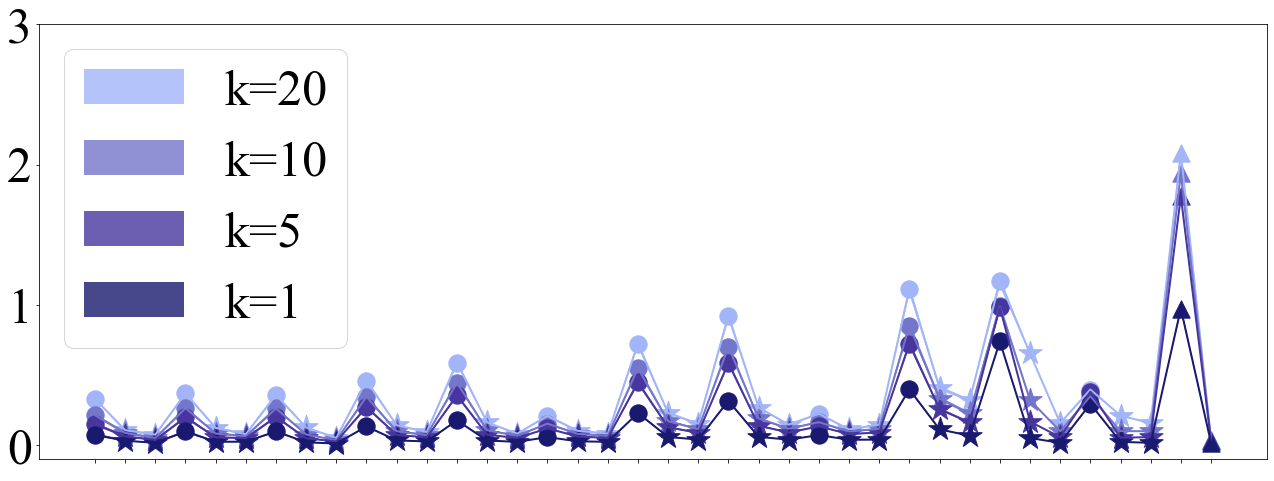

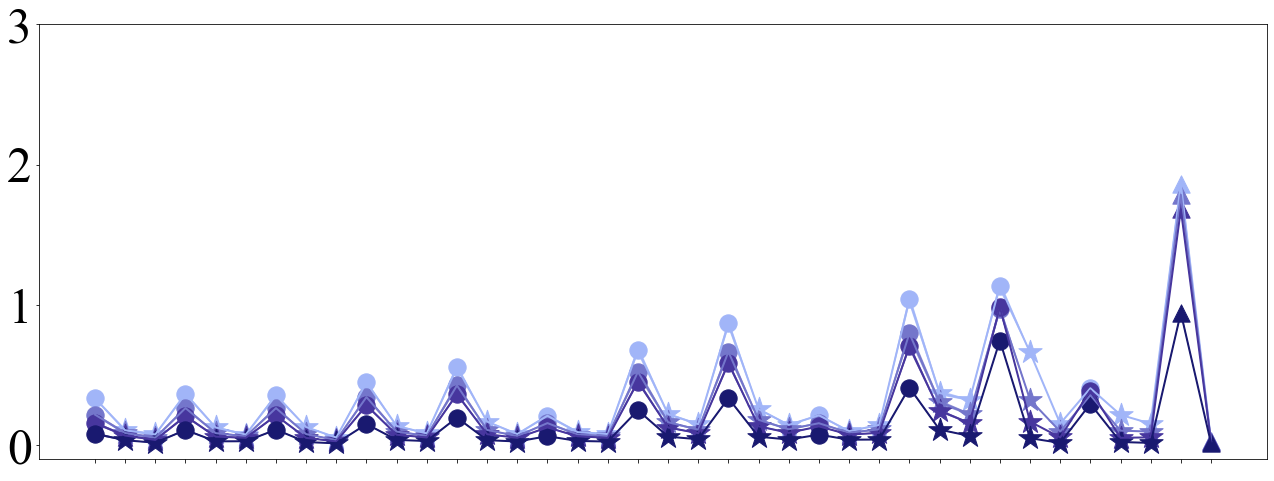

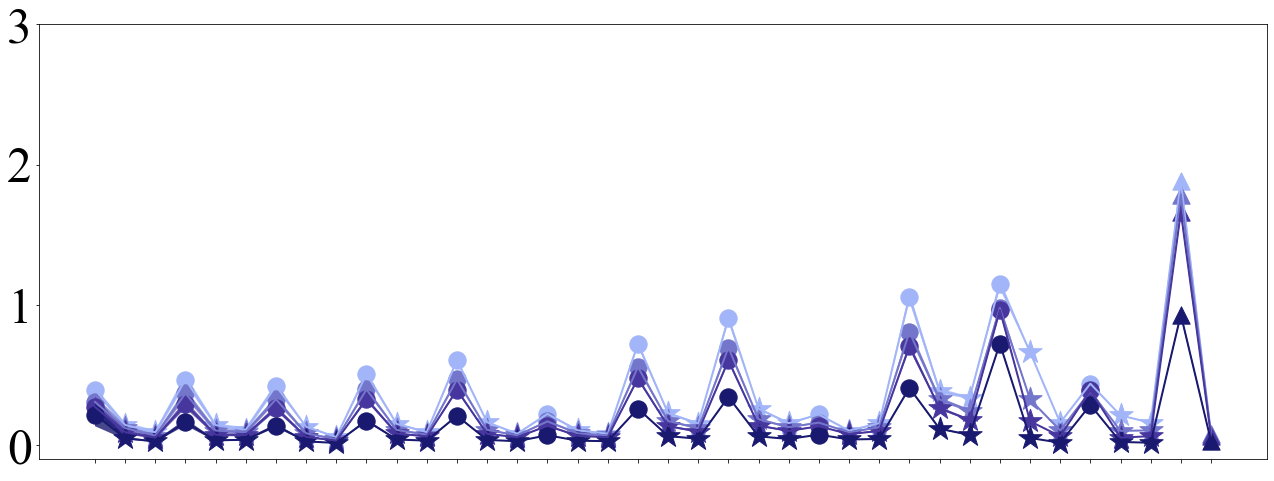

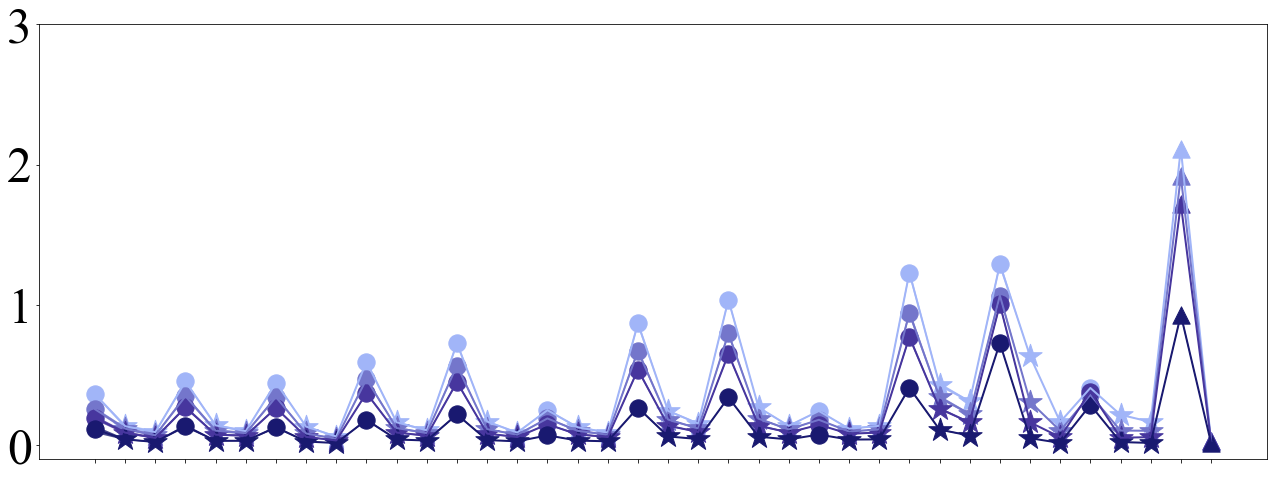

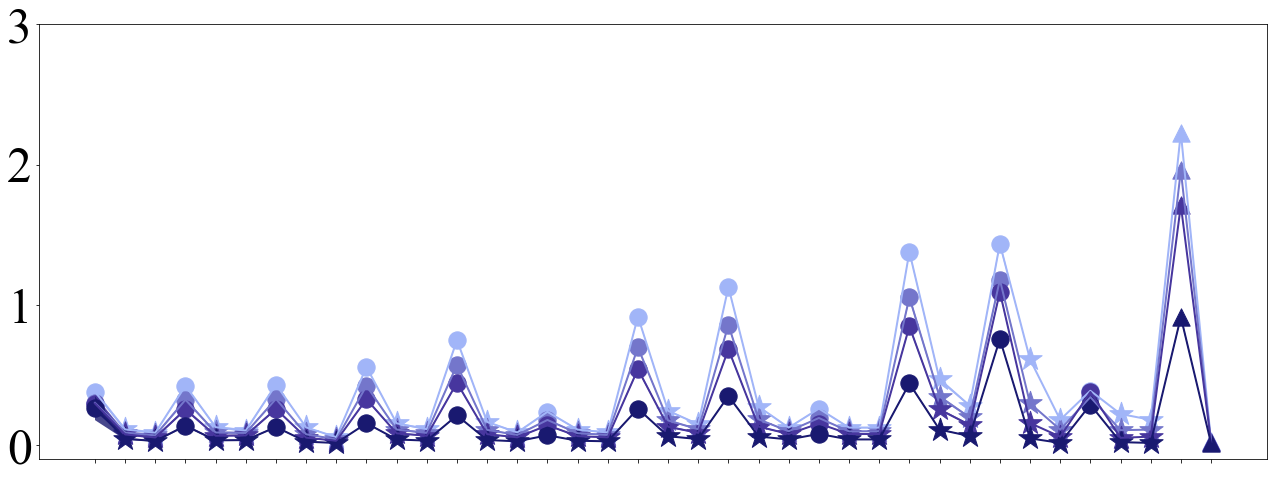

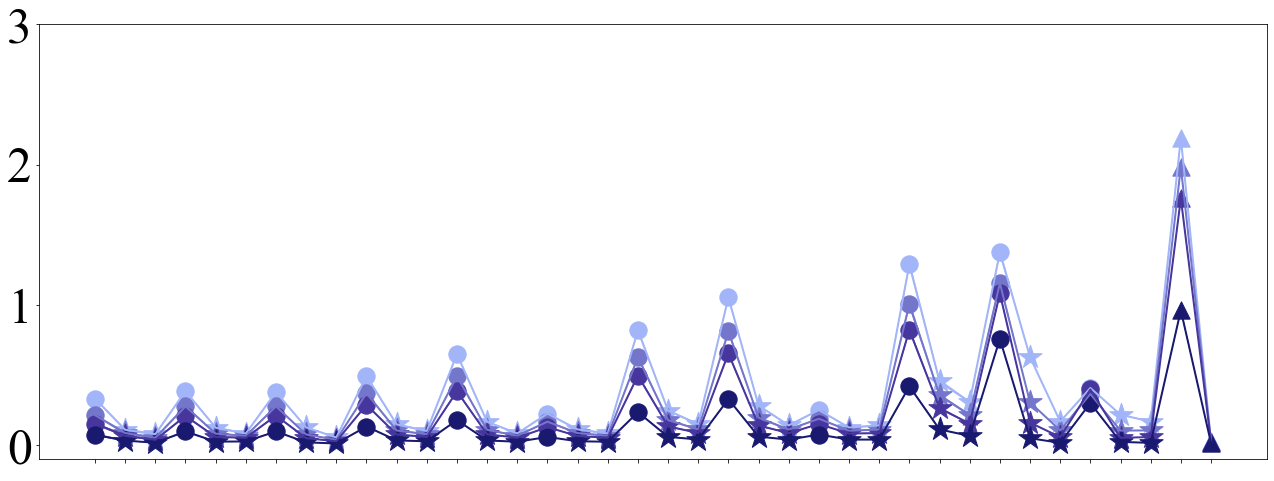

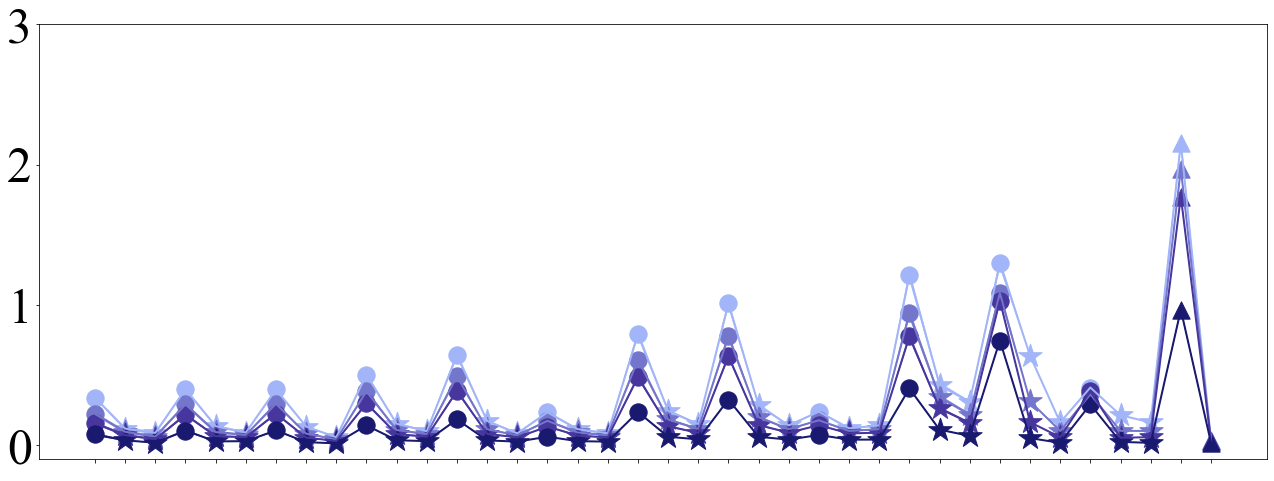

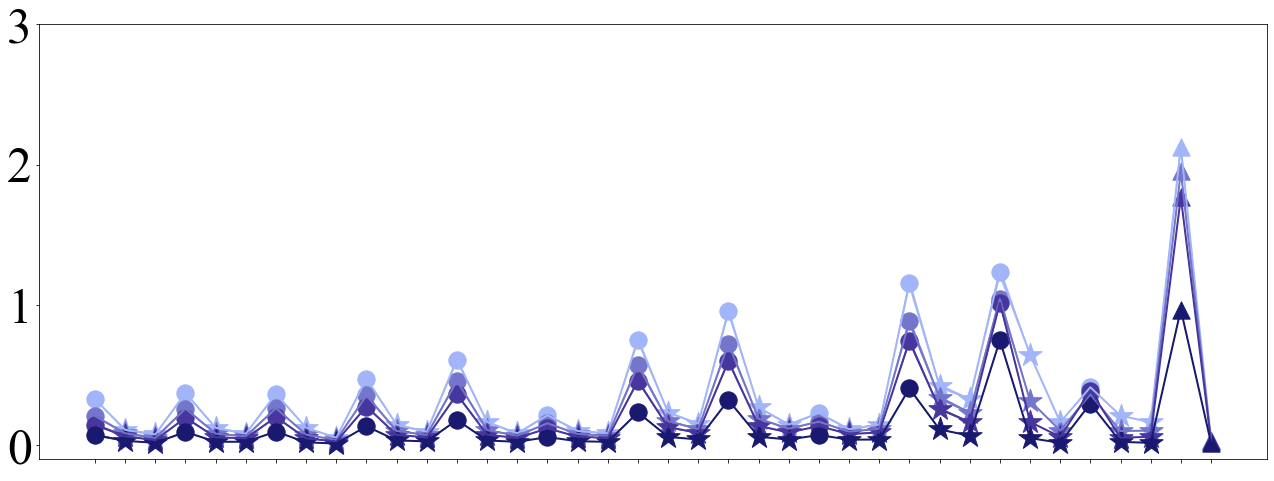

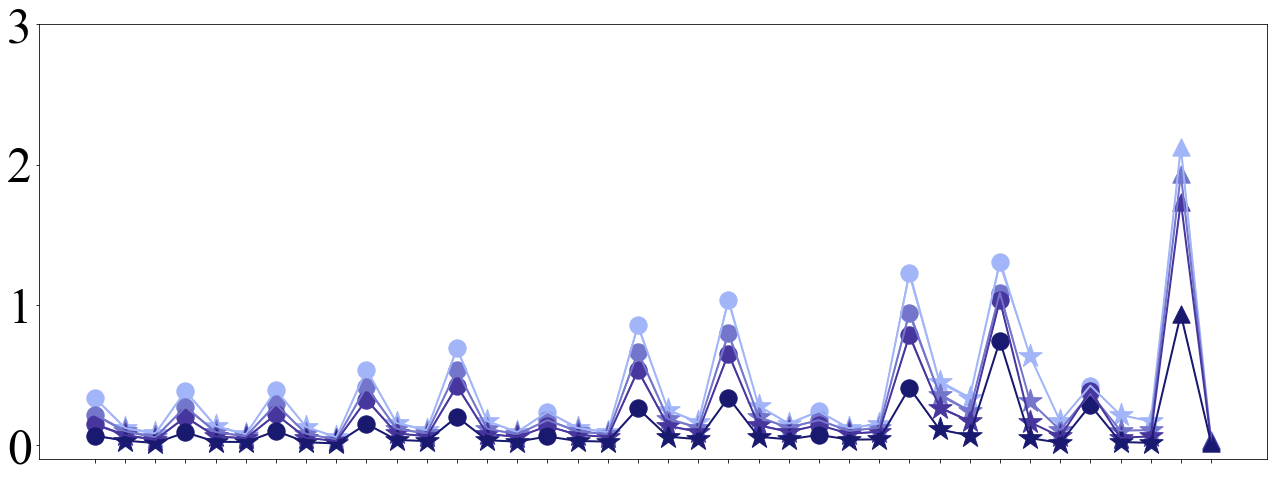

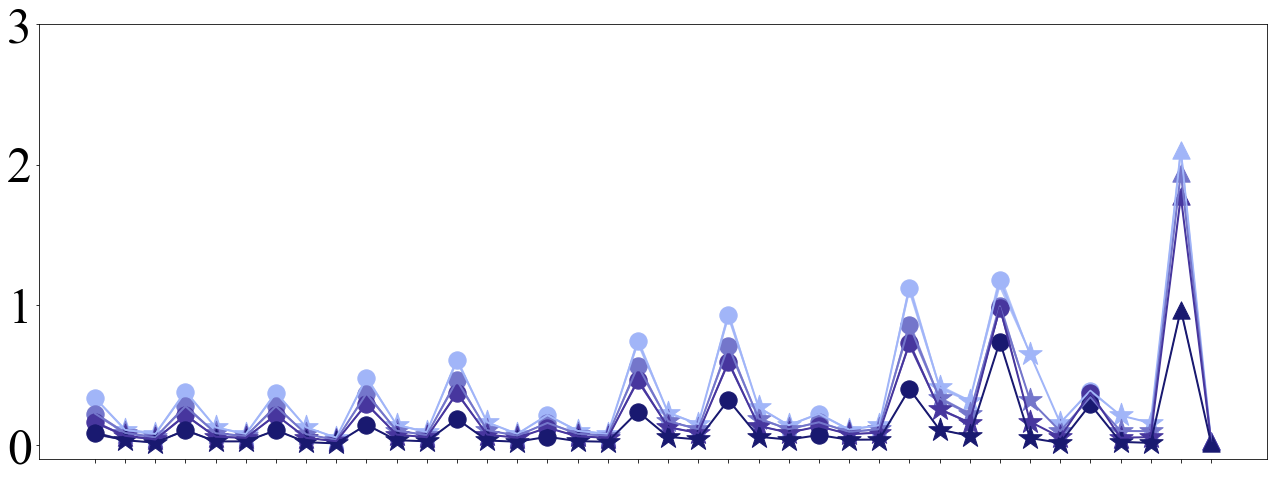

In [49]:
for data in datas+datas_fg:
    plt.subplots(figsize = (22, 8))
    path1 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/layer_diff_l2.csv'.format(data)
    df1 = pd.read_csv(path1, index_col='Unnamed: 0')
    column_list = [''] * len(df1.columns)
    path5 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/layer_diff_l2.csv'.format(data)
    df5 = pd.read_csv(path5, index_col='Unnamed: 0')
    path10 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_010shot_full_default/layer_diff_l2.csv'.format(data)
    df10 = pd.read_csv(path10, index_col='Unnamed: 0')
    path20 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/layer_diff_l2.csv'.format(data)
    df20 = pd.read_csv(path20, index_col='Unnamed: 0')


    mu1 = df1.mean()
    sigma1 = df1.std()
    mu5 = df5.mean()
    sigma5 = df5.std()
    mu10 = df10.mean()
    sigma10 = df10.std()
    mu20 = df20.mean()
    sigma20 = df20.std()
    
    # 20 shot
    plt.fill_between(df20.columns, mu20+sigma20, mu20-sigma20, facecolor='#a1b5f8', alpha=0.8, label='k=20')
    mu20.plot(linewidth = 2, color='#a1b5f8', label='' )
    for i in range(0,38,1):
        if 'BN' in df1.columns[i] or '.1.' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#a1b5f8", marker='*', label='', s = 600)
        elif 'shortcut' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#a1b5f8", marker='o', label='', s = 300)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#a1b5f8", marker='^', label='',  s = 300)
        else:
            plt.scatter(i, mu20[i], color="#a1b5f8", marker='o', label='', s = 300)
            
    # 10 shot
    plt.fill_between(df10.columns, mu10+sigma10, mu10-sigma10, facecolor='#7476cb', alpha=0.8, label='k=10')
    mu10.plot(linewidth = 2, color='#7476cb', label='')
    for i in range(0,38,1):
        if 'BN' in df1.columns[i] or '.1.' in df1.columns[i]:
            plt.scatter(i, mu10[i], color="#7476cb", marker='*', label='', s = 600)
        elif 'shortcut' in df1.columns[i]:
            plt.scatter(i, mu10[i], color="#7476cb", marker='o', label='', s = 300)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu10[i], color="#7476cb", marker='^', label='',  s = 300)
        else:
            plt.scatter(i, mu10[i], color="#7476cb", marker='o', label='', s = 300)
            
    # 5 shot
    plt.fill_between(df5.columns, mu5+sigma5, mu5-sigma5, facecolor='#47369e', alpha=0.8, label='k=5')
    mu5.plot(linewidth = 2, color='#47369e', label='')
    for i in range(0,38,1):
        if 'BN' in df1.columns[i] or '.1.' in df1.columns[i]:
            plt.scatter(i, mu5[i], color="#47369e", marker='*', label='',  s = 600)
        elif 'shortcut' in df1.columns[i]:
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='',  s = 300)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu5[i], color="#47369e", marker='^', label='', s = 300)
        else:
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='', s = 300)
    
    # 1 shot
    plt.fill_between(df1.columns, mu1+sigma1, mu1-sigma1, facecolor='midnightblue', alpha=0.8, label='k=1')
    mu1.plot(linewidth = 2, color='midnightblue', label='' )
    for i in range(0,38,1):
        if 'BN' in df1.columns[i] or '.1.' in df1.columns[i]:
            plt.scatter(i, mu1[i], color="midnightblue", marker='*', label='', s = 600)
        elif 'shortcut' in df1.columns[i]:
            plt.scatter(i, mu1[i], color="midnightblue", marker='o', label='', s = 300)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu1[i], color="midnightblue", marker='^', label='',  s = 300)
        else:
            plt.scatter(i, mu1[i], color="midnightblue", marker='o', label='', s = 300)
    plt.legend().set_visible(False)
    
    if data == 'mini_test':
        plt.legend(fontsize = 50)
    plt.xticks(np.arange(0, 38, 1), column_list, size = 25)
    plt.ylim([-0.1, 3])
    plt.yticks(np.arange(0, 3.1, 1), size=50)
    #plt.title(datas_full[datas.index(data)], size =20)
    plt.savefig('./img_pdf/layer_diff/base/mini/l2_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()

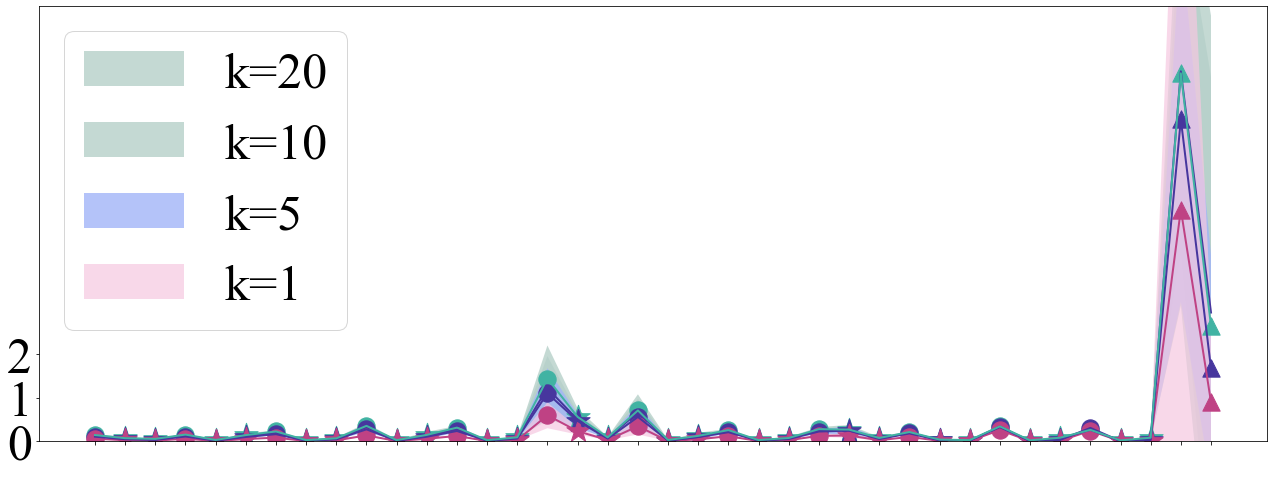

/tmp/ipykernel_17008/3998483489.py:58: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig('./img_pdf/layer_diff/base/mini/{}_sub.pdf'.format(data), bbox_inches='tight', format='pdf')
/tmp/ipykernel_17008/3998483489.py:58: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig('./img_pdf/layer_diff/base/mini/{}_sub.pdf'.format(data), bbox_inches='tight', format='pdf')
/tmp/ipykernel_17008/3998483489.py:58: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig('./img_pdf/layer_diff/base/mini/{}_sub.pdf'.format(data), bbox_inches='tight', 

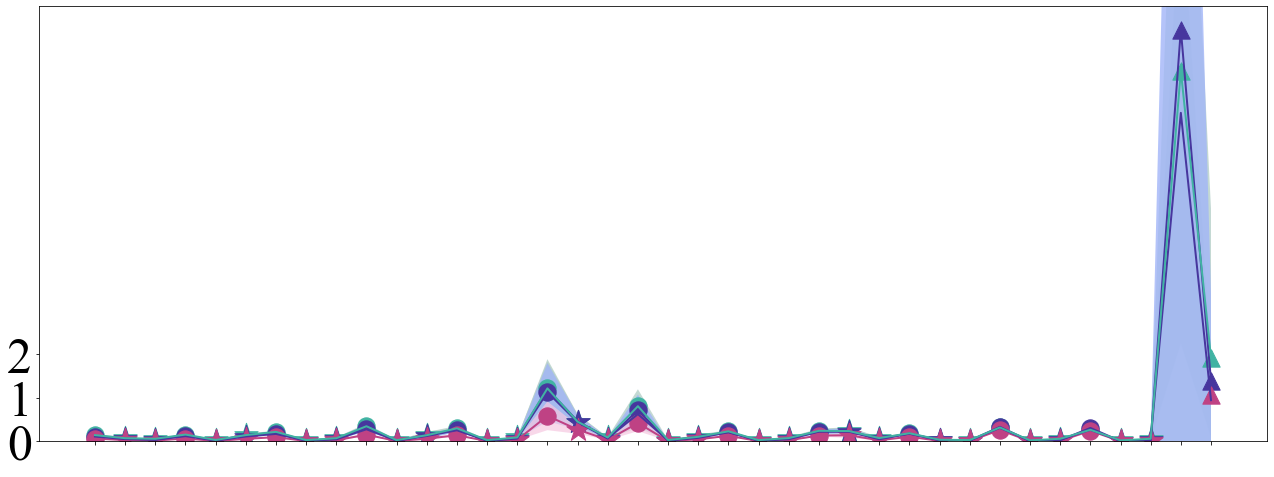

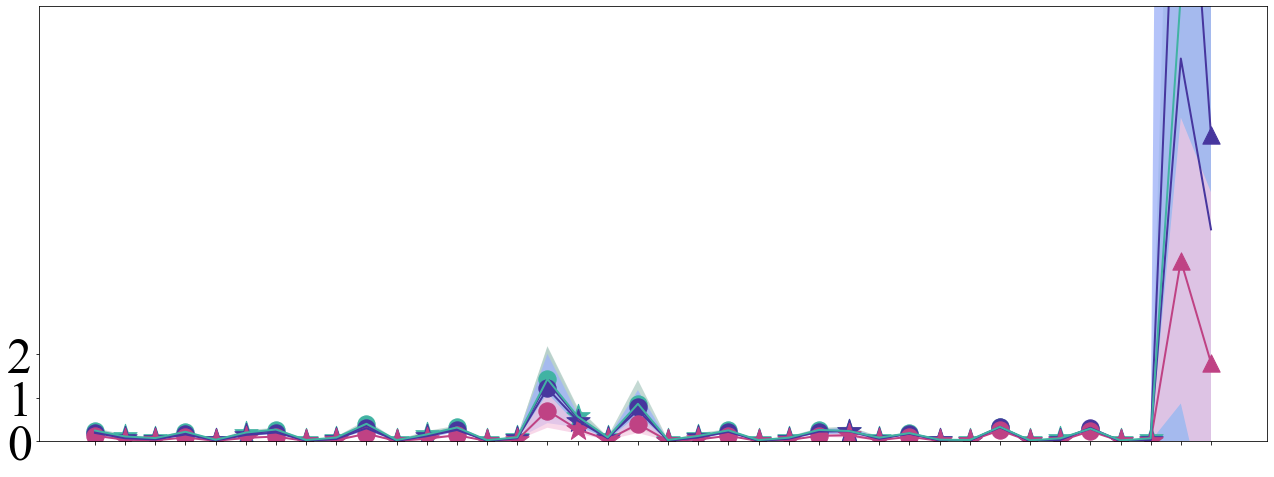

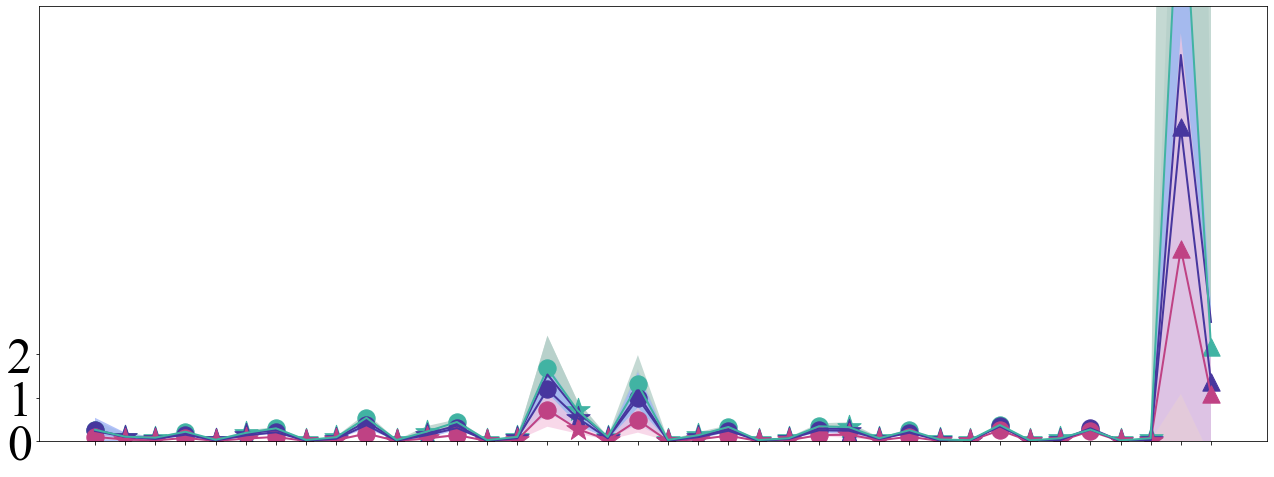

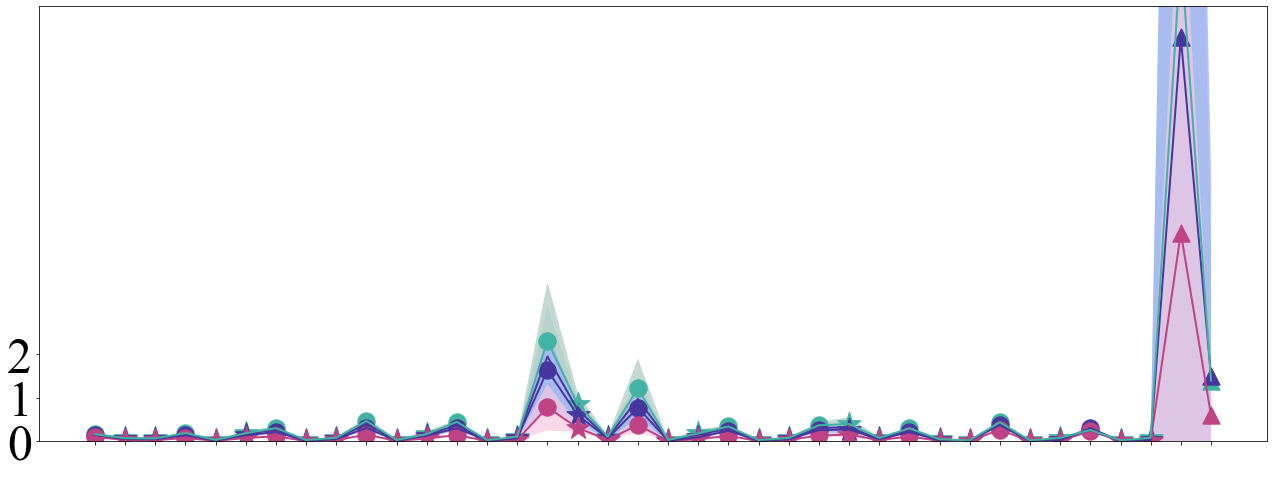

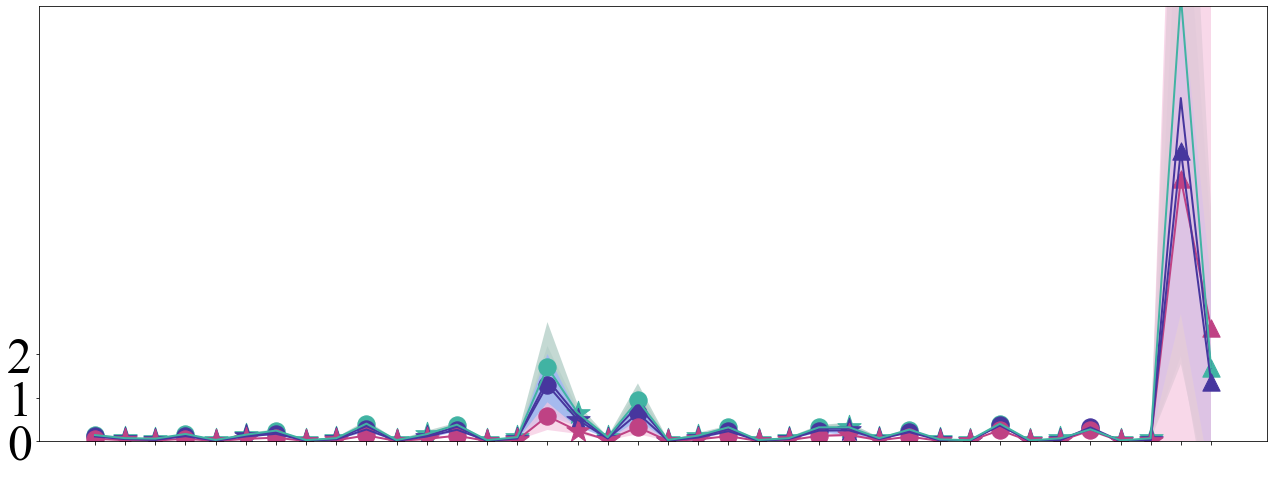

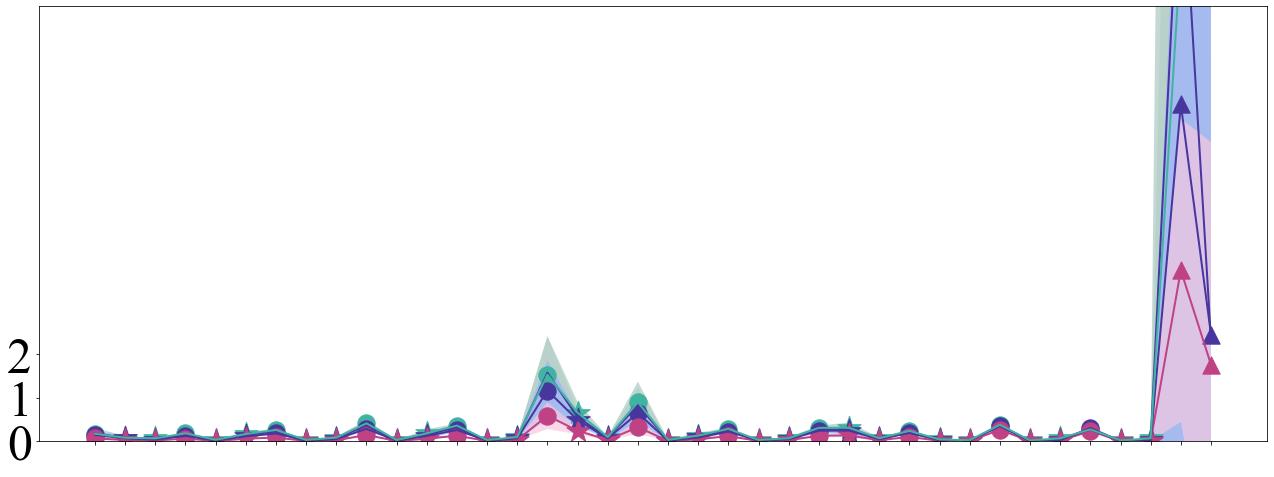

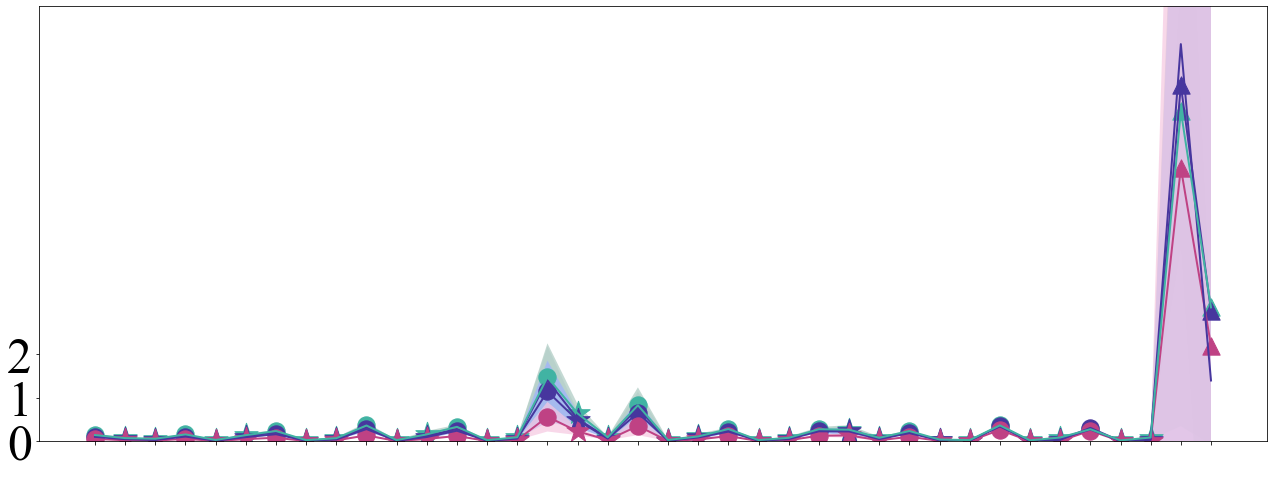

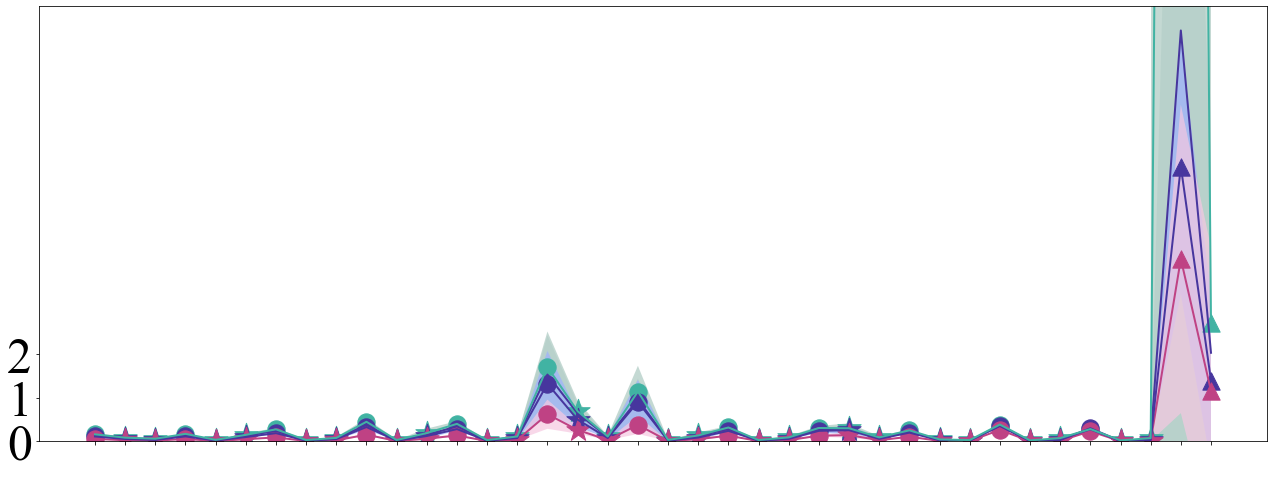

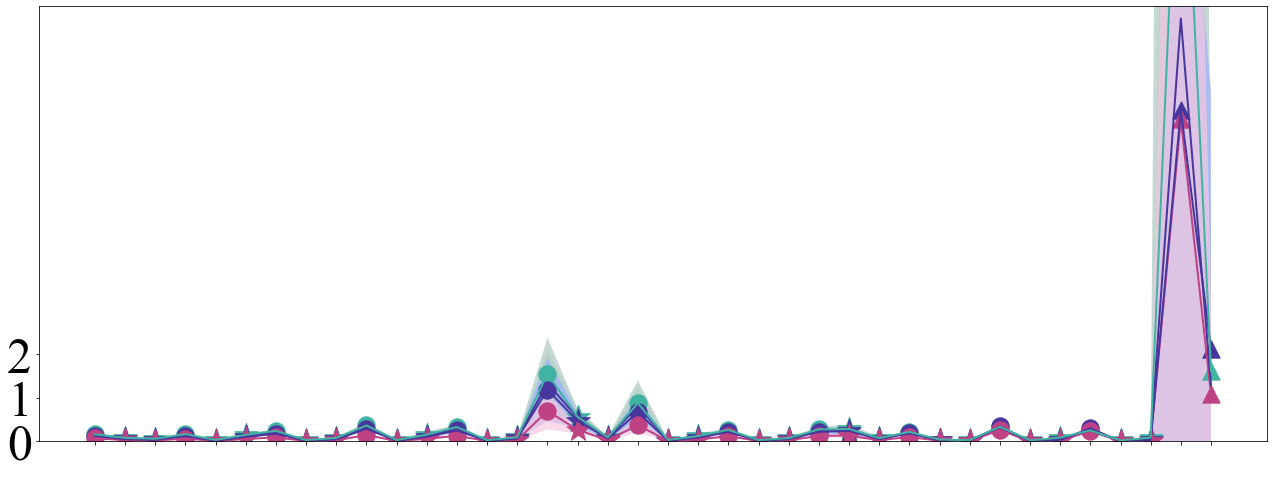

In [47]:
for data in datas+datas_fg:
    plt.subplots(figsize = (22, 8))
    path1 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/layer_diff_sub.csv'.format(data)
    df1 = pd.read_csv(path1, index_col='Unnamed: 0')
    column_list = [''] * len(df1.columns)
    path5 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/layer_diff_sub.csv'.format(data)
    df5 = pd.read_csv(path5, index_col='Unnamed: 0')
    path10 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_010shot_full_default/layer_diff_sub.csv'.format(data)
    df10 = pd.read_csv(path10, index_col='Unnamed: 0')
    path20 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/layer_diff_sub.csv'.format(data)
    df20 = pd.read_csv(path20, index_col='Unnamed: 0')


    mu1 = df1.mean()
    sigma1 = df1.std()
    mu5 = df5.mean()
    sigma5 = df5.std()
    mu10 = df10.mean()
    sigma10 = df10.std()
    mu20 = df20.mean()
    sigma20 = df20.std()
    plt.fill_between(df20.columns, mu20+sigma20, mu20-sigma20, facecolor='#B6D0C9', alpha=0.8, label='k=20')
    plt.fill_between(df10.columns, mu10+sigma10, mu10-sigma10, facecolor='#B6D0C9', alpha=0.8, label='k=10')
    plt.fill_between(df5.columns, mu5+sigma5, mu5-sigma5, facecolor='#a1b5f8', alpha=0.8, label='k=5')
    plt.fill_between(df1.columns, mu1+sigma1, mu1-sigma1, facecolor='#f6c8e1', alpha=0.7, label='k=1')
    
    mu1.plot(linewidth = 2, color='#bf4284', label='' )
    mu5.plot(linewidth = 2, color='#47369e', label='')
    mu10.plot(linewidth = 2, color='#47369e', label='')
    mu20.plot(linewidth = 2, color='#41B3A3', label='' )
    plt.legend().set_visible(False)
    
    for i in range(0,38,1):
        if 'BN' in df1.columns[i] or '.1.' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='*', label='', s = 600)
            plt.scatter(i, mu5[i], color="#47369e", marker='*', label='',  s = 600)
            plt.scatter(i, mu1[i], color="#bf4284", marker='*', label='', s = 600)
        elif 'shortcut' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='o', label='', s = 300)
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='',  s = 300)
            plt.scatter(i, mu1[i], color="#bf4284", marker='o', label='', s = 300)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='^', label='',  s = 300)
            plt.scatter(i, mu5[i], color="#47369e", marker='^', label='', s = 300)
            plt.scatter(i, mu1[i], color="#bf4284", marker='^', label='',  s = 300)
        else:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='o', label='', s = 300)
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='', s = 300)
            plt.scatter(i, mu1[i], color="#bf4284", marker='o', label='', s = 300)

    
    if data == 'mini_test':
        plt.legend(fontsize = 50)
    plt.xticks(np.arange(0, 38, 1), column_list, size = 25)
    plt.ylim([0.01, 10])
    plt.yticks(np.arange(0, 3, 1), size=50)
    #plt.title(datas_full[datas.index(data)], size =20)
    plt.savefig('./img_pdf/layer_diff/base/mini/{}_sub.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()

In [ ]:
list(df1.columns)

['backbone.trunk.0.weight',
 'backbone.trunk.1.weight',
 'backbone.trunk.1.bias',
 'backbone.trunk.4.C1.weight',
 'backbone.trunk.4.BN1.weight',
 'backbone.trunk.4.BN1.bias',
 'backbone.trunk.4.C2.weight',
 'backbone.trunk.4.BN2.weight',
 'backbone.trunk.4.BN2.bias',
 'backbone.trunk.5.C1.weight',
 'backbone.trunk.5.BN1.weight',
 'backbone.trunk.5.BN1.bias',
 'backbone.trunk.5.C2.weight',
 'backbone.trunk.5.BN2.weight',
 'backbone.trunk.5.BN2.bias',
 'backbone.trunk.5.shortcut.weight',
 'backbone.trunk.5.BNshortcut.weight',
 'backbone.trunk.5.BNshortcut.bias',
 'backbone.trunk.6.C1.weight',
 'backbone.trunk.6.BN1.weight',
 'backbone.trunk.6.BN1.bias',
 'backbone.trunk.6.C2.weight',
 'backbone.trunk.6.BN2.weight',
 'backbone.trunk.6.BN2.bias',
 'backbone.trunk.6.shortcut.weight',
 'backbone.trunk.6.BNshortcut.weight',
 'backbone.trunk.6.BNshortcut.bias',
 'backbone.trunk.7.C1.weight',
 'backbone.trunk.7.BN1.weight',
 'backbone.trunk.7.BN1.bias',
 'backbone.trunk.7.C2.weight',
 'backbone